In [ ]:
"""
This is a project can compute decision tree models 
by applying online collected data from Moral Machine platform

"""

In [1]:
# load packages
import numpy as np
import pandas as pd
import random
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG, display
from graphviz import Source

"""
 p defines the percentage of the lines
 if random from [0,1] interval is greater than 0.01 the row will be skipped
 originally from stackoverflow question no.22258491
"""

p = 0.5
df = pd.read_csv(
         "SharedResponsesFullFirstSessions.csv",
         header  =0, 
         skiprows=lambda i: i>0 and random.random() > p
)

In [ ]:
# print functions for basic info
# not necessary for decision tree

print(df.shape)
print(df.columns)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
print(df.head(100))         # show the first 100 entries

NoIDcolumns = ['ScenarioOrder','Intervention', 'PedPed', 'Barrier', 
                'CrossingSignal', 'AttributeLevel', 'ScenarioTypeStrict', 
                'ScenarioType', 'DefaultChoice', 'NonDefaultChoice', 
                'DefaultChoiceIsOmission', 'NumberOfCharacters',
                'DiffNumberOFCharacters', 'Saved', 'Template', 
                'DescriptionShown', 'LeftHand', 'UserCountry3']

for i in df[NoIDcolumns]:   # show unique contents in some columns
    print(i, ": ", df[i].unique())

In [2]:
# removing the randomness in data set
mask1=df['ScenarioTypeStrict'] !='Random'
mask2=df['ScenarioType'] != 'Random'
mask3=df['ScenarioType'].notna()
mask4=pd.concat((mask1,mask2,mask3), axis=1)
mask5=mask4.all(axis=1)

df = df[mask5]

In [3]:
# prepare the data
# converting string to int 
for i in ['AttributeLevel', 'ScenarioType', 'DefaultChoice']:
    df[i], _ = pd.factorize(df[i])

In [4]:
# list1: before correlation
"""
list1 = ['Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
        'ScenarioType', 'DefaultChoice', 'DefaultChoiceIsOmission', 
        'NumberOfCharacters', 'DiffNumberOFCharacters']
"""
# list1: after correlation
list2 = ['Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
        'DefaultChoiceIsOmission', 'NumberOfCharacters', 'DiffNumberOFCharacters']

# set target
# X1 = df[list1]
X2 = df[list2]
Y  = df[['Saved']]

In [ ]:
# check their size
# not necessary for decision tree

print(X2.shape == Y.shape)

In [5]:
#spilt data into train and test set
X_train, X_test, y_train, y_test = train_test_split( X2, Y, test_size = 0.75, random_state = 100)

### the ultimate tree ###
clf_gini_u = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=None,
                                  min_samples_leaf=round(38078300/5000))
clf_gini_u.fit(X_train, y_train)

### The chosen tree ###
# max_depth = 5, min_sample = 2% of 38078300
# results in a clearer and much smaller tree

clf_gini_c = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5,
                                  min_samples_leaf=round(38078300/50))
clf_gini_c.fit(X_train, y_train)

"""
max_depth = 5, min_sample = 0.01% of 38078300

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5,
                                  min_samples_leaf=round(38078300/10000))
clf_gini.fit(X_train, y_train)

"""

'\nmax_depth = 5, min_sample = 0.01% of 38078300\n\nclf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5,\n                                  min_samples_leaf=round(38078300/10000))\nclf_gini.fit(X_train, y_train)\n\n'

In [ ]:
# display the utree
labels = X2.columns
ugraph = Source(tree.export_graphviz(clf_gini_u, out_file= None
   , feature_names=labels, class_names=['Sacrificed', 'Saved'] 
   , filled = True))

display(SVG(ugraph.pipe(format='svg')))

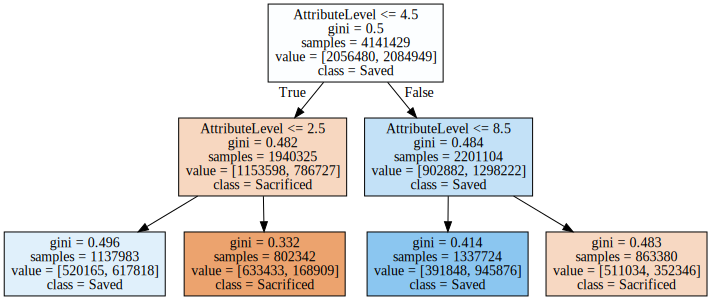

In [6]:
# display the ctree
labels = X2.columns
cgraph = Source(tree.export_graphviz(clf_gini_c, out_file= None
   , feature_names=labels, class_names=['Sacrificed', 'Saved'] 
   , filled = True))

display(SVG(cgraph.pipe(format='svg')))

In [ ]:
"""
attept on another criterion

# clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5,
#                                      min_samples_leaf=round(38078300/5000))
# clf_entropy.fit(X_train, y_train)

"""

# accuracy test with clf_entropy
#y_pred = clf_entropy.predict(X_test)
#print(accuracy_score(y_test, y_pred))

# results in same accuracy when setting is same

In [ ]:
# print utree info
print("utree depth is", clf_gini_u.tree_.max_depth)
print("number of leaves: ", clf_gini_u.tree_.node_count)

# print ctree info
print("utree depth is", clf_gini_c.tree_.max_depth)
print("number of leaves: ", clf_gini_c.tree_.node_count)

# accuracy test
y_pred_u = clf_gini_u.predict(X_test)
print(accuracy_score(y_test, y_pred_u))

y_pred_c = clf_gini_c.predict(X_test)
print(accuracy_score(y_test, y_pred_c))

In [ ]:
# Convert model from .dot to .png
# the png can be found in the same file as the code

from subprocess import call

### utree ###
tree.export_graphviz(clf_gini_u, out_file= 'tree_u.dot'
   , feature_names=labels, class_names=['Sacrificed','Saved'] 
   , filled = True)

call(['dot', '-Tpng', 'tree_u.dot', '-o', 'tree_u.png', '-Gdpi=100'])

In [ ]:
### ctree ###
tree.export_graphviz(clf_gini_c, out_file= 'tree_c.dot'
   , feature_names=labels, class_names=['Sacrificed','Saved'] 
   , filled = True)

call(['dot', '-Tpng', 'tree_c.dot', '-o', 'tree_c.png', '-Gdpi=600'])

In [ ]:
# 5% data loaded with max_depth = NONE
# L1=0.7310951862412988
# L2=0.7310951862412988

# 25% data loaded 
# with tree depth 15
# L2=0.7310860187843127